In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import nengo
import nengo_spa as spa

from nengo_learn_assoc_mem.utils import make_alt_vocab
from nengo_learn_assoc_mem.utils import gen_feed_func

In [2]:
dimensions = 64
n_neurons = 1000
seed = 8
p_fan = 0.85

t_present = 0.3
dt = 0.001

In [7]:
vocab, fan1, fan1_pair_vecs, fan2, fan2_pair_vecs, foil1, foil1_pair_vecs, foil2, foil2_pair_vecs = make_alt_vocab(5, 5, dimensions, seed, norm=True)

In [34]:
all_fan = fan1 + fan2
all_fan_pairs = [f"{f1}+{f2}" for f1, f2 in all_fan]

all_foil = foil1 + foil2
all_foil_pairs = [f"{f1}+{f2}" for f1, f2 in all_foil]

fan_and_foil = fan1 + fan2 + foil1 + foil2
ff_pairs = [f"{f1}+{f2}" for f1, f2 in fan_and_foil]

In [35]:
with spa.Network('CleanupThresh', seed=1) as model:
    stim = nengo.Node(gen_feed_func(vocab, ff_pairs, t_present))
    model.assoc_mem = spa.WTAAssocMem(
        threshold=0.3,
        input_vocab=vocab,
        mapping=dict(zip(all_fan_pairs, all_fan_pairs)),
        function=lambda x: x > 0.)
    
    nengo.Connection(stim, model.assoc_mem.input, synapse=None)
    
    p_cor = nengo.Probe(stim, synapse=None)
    p_out = nengo.Probe(model.assoc_mem.output, synapse=0.01)

with nengo.Simulator(model) as sim:
    sim.run(len(ff_pairs)*t_present)

Building finished in 0:00:01.                                                                                                                 
Simulating finished in 0:00:04.                                                                                                               


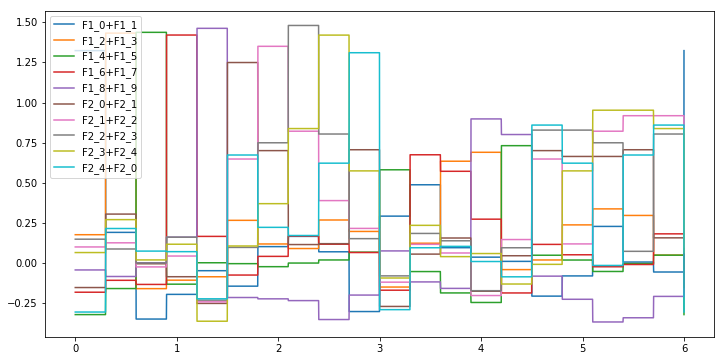

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(sim.trange(), spa.similarity(sim.data[p_cor], fan1_pair_vecs+fan2_pair_vecs))
plt.legend(all_fan_pairs)

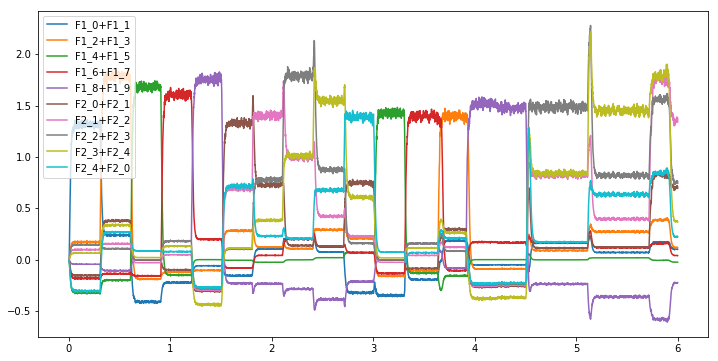

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(sim.trange(), spa.similarity(sim.data[p_out], fan1_pair_vecs+fan2_pair_vecs))
plt.legend(all_fan_pairs)

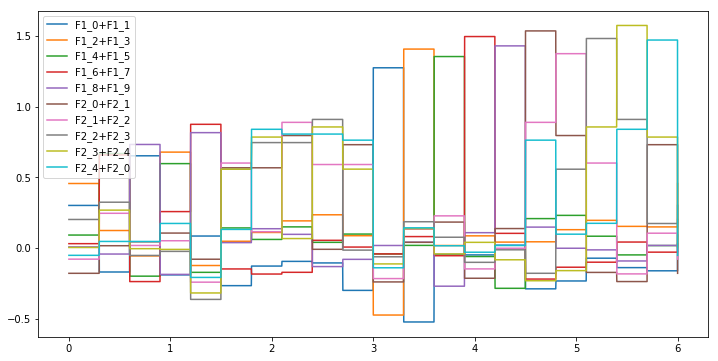

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(sim.trange(), spa.similarity(sim.data[p_cor], foil1_pair_vecs+foil2_pair_vecs))
plt.legend(all_fan_pairs)

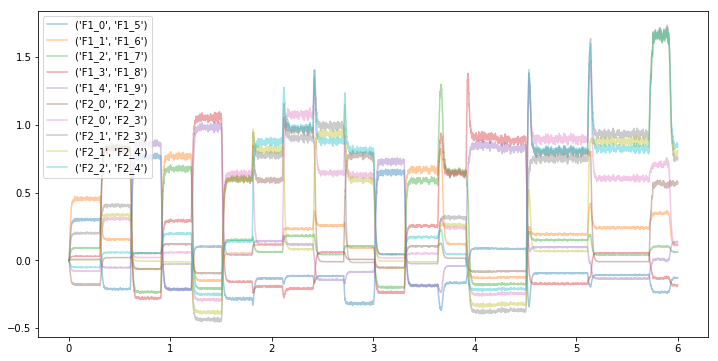

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(sim.trange(), spa.similarity(sim.data[p_out], foil1_pair_vecs+foil2_pair_vecs), alpha=0.4)
plt.legend(all_foil)